In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
%matplotlib inline


In [2]:
df_posts = pd.read_csv('../data/senti_posts.zip').drop(6161) # bad row
df_posts['timestamp'] = pd.to_datetime(df_posts['timestamp'])
df_posts['score'] = pd.to_numeric(df_posts['score'])
df_posts['hour_date'] = pd.to_datetime(df_posts['timestamp'].dt.strftime('%Y-%m-%dT%H'))
df_posts['date'] = pd.to_datetime(df_posts['timestamp'].dt.strftime('%Y-%m-%d'))

df_posts = df_posts[df_posts['hour_date'] >= '2021-01-29']


In [35]:
df_posts.columns

Index(['title', 'score', 'id', 'url', 'comms_num', 'created', 'body',
       'timestamp', 'sent_label', 'sent_score', 'hour_date', 'date'],
      dtype='object')

In [17]:
df_comments = pd.read_csv('../data/senti_comments.zip', lineterminator='\n') \
    .merge(df_posts[['id', 'hour_date', 'date']], left_on='id_col', right_on='id') \
    .drop('id', axis=1)

df_comments = df_comments[df_comments['hour_date'] >= '2021-01-29']

In [22]:
df_posts['score']

1197        1
1198        1
1199        1
1200        2
1201       10
         ... 
53183     238
53184     228
53185    7398
53186     338
53187      40
Name: score, Length: 51988, dtype: int64

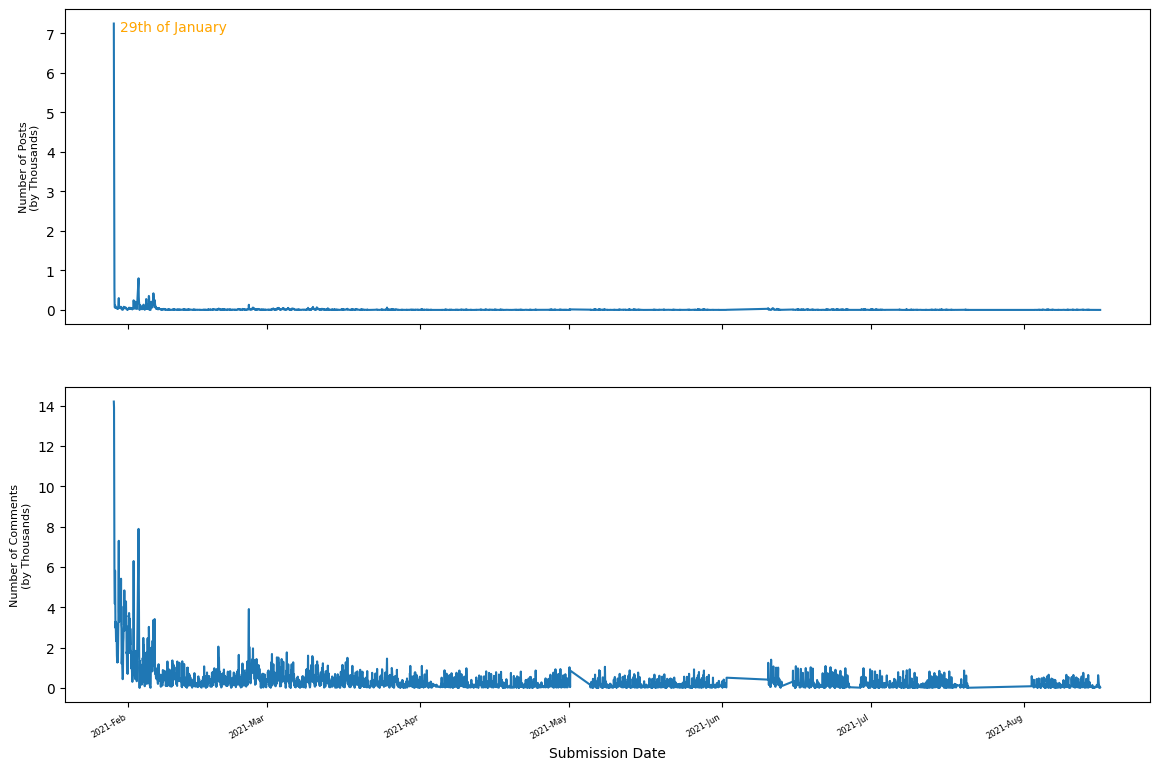

In [9]:
col_name = ['hour_date', 'count']

num_posts = df_posts.groupby('hour_date')['id'].nunique().reset_index()
num_posts.columns = col_name

num_comments = df_comments.groupby('hour_date').size().to_frame().reset_index()
num_comments.columns = col_name

day_of_squeeze = num_posts[num_posts['count']==np.max(num_posts['count'])]['hour_date'].to_list()[0]
peak_comments = num_comments[num_comments['count']>=np.max(num_comments['count'])]['hour_date'].to_list()[0]

plt.rcParams["figure.figsize"] = [14,9]
fig, ax = plt.subplots(2,1, sharex = True)

ax[0].plot(num_posts['hour_date'], num_posts['count']/1000)
ax[0].set_ylabel('Number of Posts\n(by Thousands)', fontsize=8)
ax[0].annotate('29th of January', xy=(day_of_squeeze, np.max(num_posts['count']/1000)),
               xytext=(4.5, -5.5), textcoords='offset points', color='orange')
ax[1].plot(num_comments['hour_date'], num_comments['count']/1000)
ax[1].set_ylabel('Number of Comments\n(by Thousands)', fontsize=8)
ax[1].set_xlabel('Submission Date')
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

plt.xticks(fontsize=6)
for label in ax[1].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right');

In [101]:
df_posts[df_posts['comms_num']==np.max(df_posts['comms_num'])]

,title,score,id,url,comms_num,created,body,timestamp,sent_label,sent_score,hour_day
39994,"GME Megathread for March 10, 2021",47667,m1xhlc,https://www.reddit.com/r/wallstreetbets/commen...,93268.0,1.615412e+09,HOLYMOLYHOLYMOLYHOLYMOLYHOLYMOLYHOLYMOLYHOLYMO...,2021-03-10 23:30:11,positive,0.993393,2021-03-10 23:00:00


In [124]:
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53187 entries, 0 to 53187
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   title       53181 non-null  object        
 1   score       53187 non-null  int64         
 2   id          53187 non-null  object        
 3   url         53187 non-null  object        
 4   comms_num   53187 non-null  float64       
 5   created     53187 non-null  float64       
 6   body        24606 non-null  object        
 7   timestamp   53186 non-null  datetime64[ns]
 8   sent_label  53186 non-null  object        
 9   sent_score  53186 non-null  float64       
 10  hour_day    53186 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 4.9+ MB


In [104]:
id_posts_21_may = df_posts[df_posts['hour_date']==peak_comments]['id']
df_comm_21_may = df_comments[df_comments['id_col'].isin(id_posts_21_may)]

In [106]:
col_nums = df_comm_21_may.groupby('id_col')['comments'].nunique().reset_index()

In [107]:
col_nums

,id_col,comments
0,nh72em,118
1,nh81w4,60
2,nh8f2j,30
3,nh8frn,13


In [108]:
df_posts[df_posts['hour_date']==peak_comments][['id', 'comms_num']]

,id,comms_num
47423,nh8frn,22.0
47424,nh8f2j,53.0
47425,nh81w4,219.0
47426,nh72em,407.0


In [90]:
peak_posts = num_posts[num_posts['count']==np.max(num_posts['count'])]['hour_date'].to_list()[0]
peak_comments = num_comments[num_comments['count']>=np.max(num_comments['count'])]['hour_date'].to_list()[0]

peak_comments

Timestamp('2021-05-21 05:00:00')

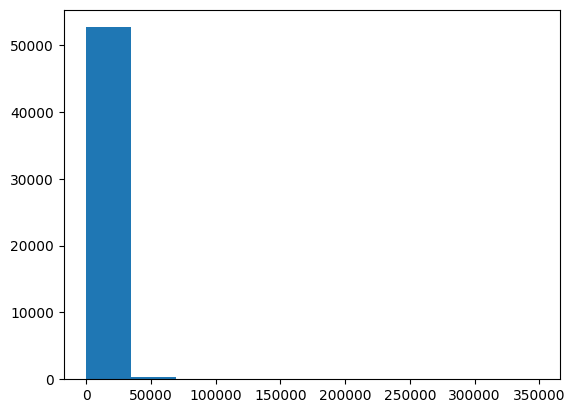

In [23]:
fig, ax = plt.subplots(1,1)
ax.hist(df_posts['score']);

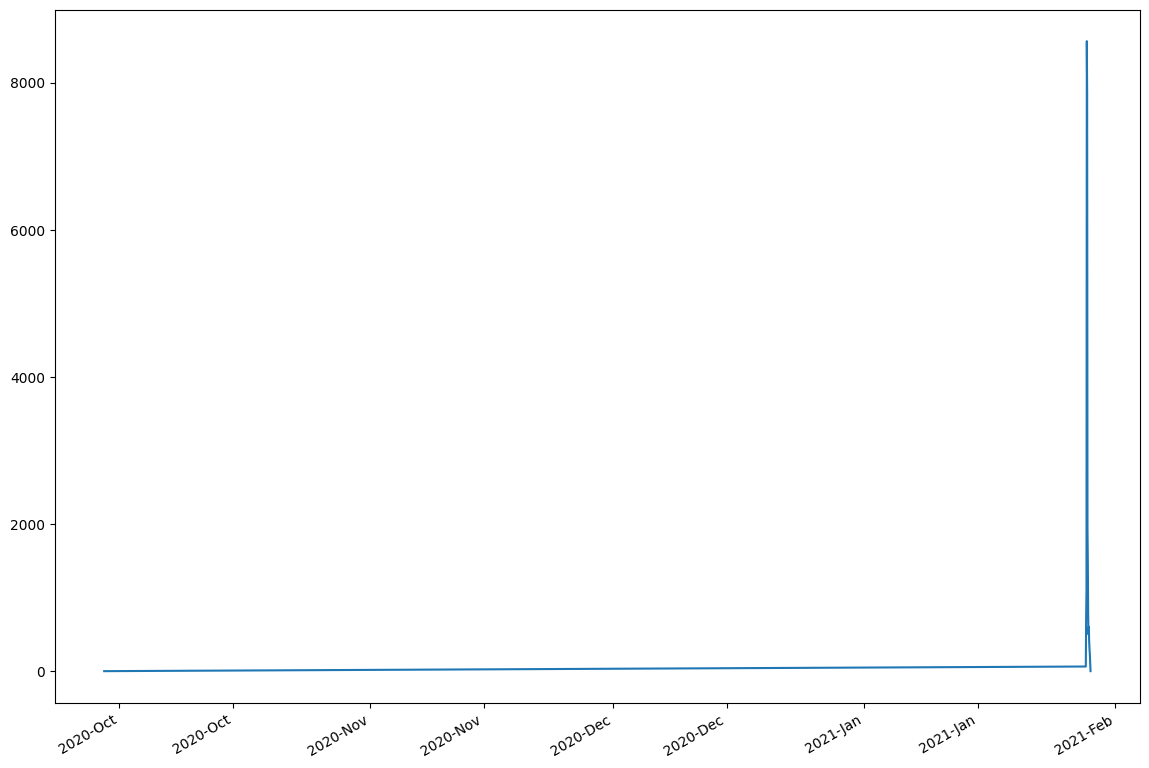

In [127]:
# Upvote count
score_m = df_posts.groupby('hour_date')['score'].agg(np.median).to_frame().reset_index()

score_m = score_m[score_m['hour_date'] < '2021-01-29']

fig, ax = plt.subplots(1,1)

ax.plot(score_m['hour_date'], score_m['score'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right');

In [128]:
score_m

,hour_day,score
0,2020-09-29 03:00:00,4.0
1,2021-01-28 09:00:00,67.0
2,2021-01-28 10:00:00,748.5
3,2021-01-28 11:00:00,1091.0
4,2021-01-28 12:00:00,8563.0
5,2021-01-28 13:00:00,7847.0
6,2021-01-28 14:00:00,1944.0
7,2021-01-28 15:00:00,1485.5
8,2021-01-28 16:00:00,775.0
9,2021-01-28 17:00:00,503.0


In [50]:
def sentiment_counts(df, ax=None, relative=False):
    sent_date = df.groupby(['date', 'sent_label']).size().to_frame('size').reset_index()\
        .pivot(index='date',columns='sent_label', values='size').reset_index().fillna('0')
    sent_date[['negative', 'positive']] = sent_date[['negative', 'positive']].astype('int32')

    # fig, ax = plt.subplots(1, 1)
    if relative is True:
        sent_date['tot'] = sent_date['negative'] + sent_date['positive']
        sent_date['negative'] = sent_date['negative']/sent_date['tot']
        sent_date['positive'] = sent_date['positive']/sent_date['tot']

    if ax is None:
        ax = plt.gca()
    for col in ['negative', 'positive']:
        ax.plot(sent_date['date'], sent_date[col], label=col)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')

    return ax

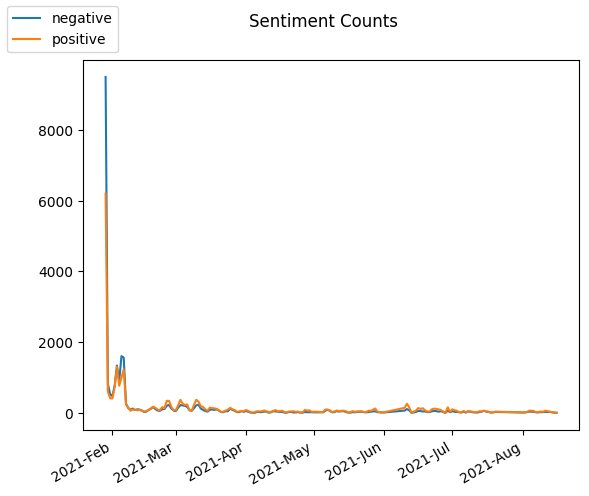

In [51]:
fig, ax = plt.subplots(1, 1)
sentiment_counts(df_posts, ax)
fig.legend(loc='upper left')
fig.suptitle('Sentiment Counts');

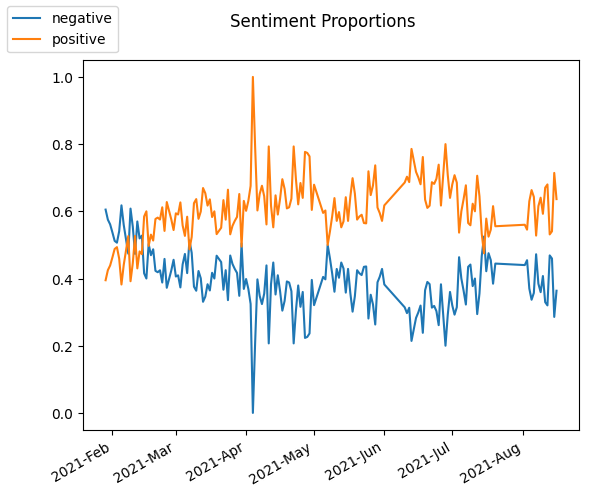

In [52]:
fig, ax = plt.subplots(1, 1)
sentiment_counts(df_posts, ax, relative=True)
fig.legend(loc='upper left')
fig.suptitle('Sentiment Proportions');

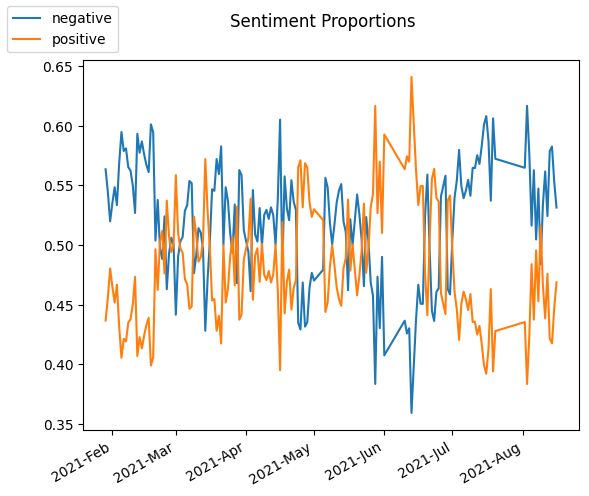

In [15]:
sent_date_comm = df_comments.groupby(['date', 'sent_label']).size().to_frame('size').reset_index()\
            .pivot(index='date',columns='sent_label', values='size').reset_index().fillna('0')

sent_date_comm[['negative', 'positive']] = sent_date_comm[['negative', 'positive']].astype('int32')

sent_date_comm['tot'] = sent_date_comm['negative'] + sent_date_comm['positive']
sent_date_comm['negative'] = sent_date_comm['negative'] / sent_date_comm['tot']
sent_date_comm['positive'] = sent_date_comm['positive'] / sent_date_comm['tot']

fig, ax = plt.subplots(1, 1)
for col in ['negative', 'positive']:
    ax.plot(sent_date_comm['date'], sent_date_comm[col], label=col)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
fig.legend(loc='upper left')
fig.suptitle('Sentiment Proportions');


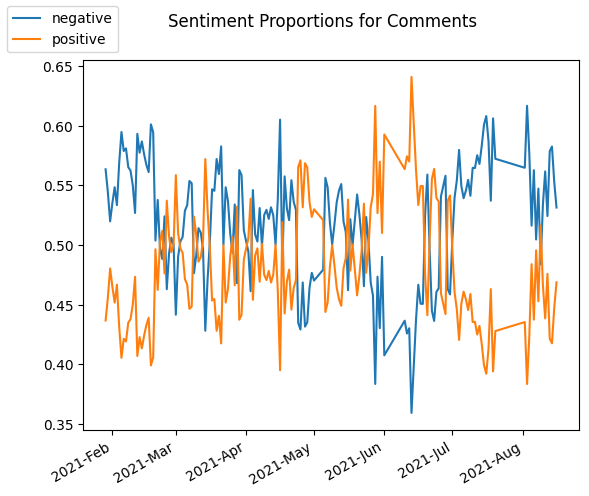

In [54]:
fig, ax = plt.subplots(1, 1)
sentiment_counts(df_comments, ax, relative=True)
fig.legend(loc='upper left')
fig.suptitle('Sentiment Proportions for Comments');

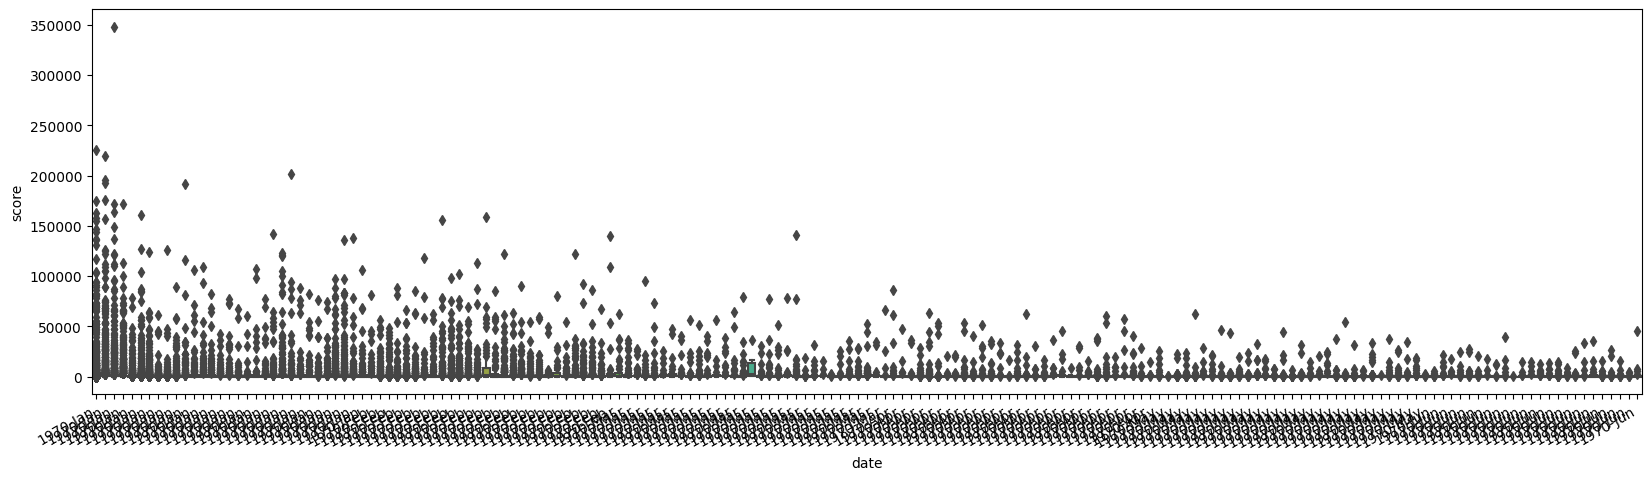

In [26]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x = df_posts['date'],y = df_posts['score'], ax = ax)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

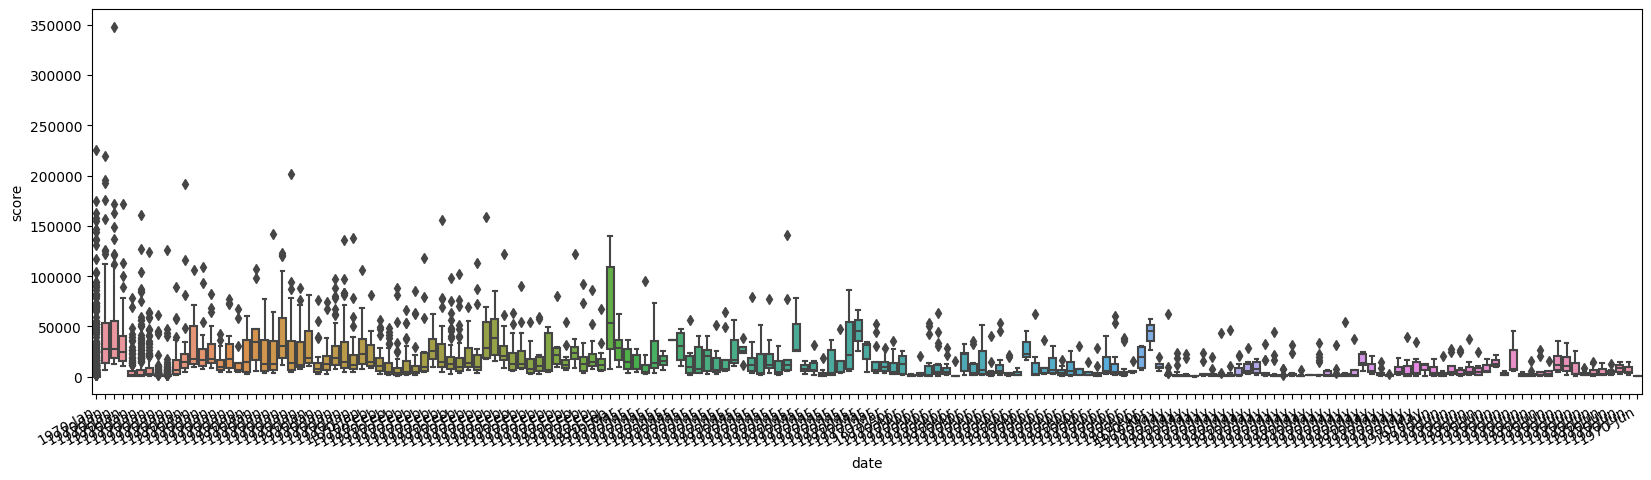

In [57]:
## Only posts in the top 20% score per date
df_top_posts = df_posts.groupby(['date']).apply(lambda g: g[g['score']>=np.quantile(g['score'], 0.9)]).reset_index(drop=True)
amount_stayed = df_top_posts.shape[0]/df_posts.shape[0]

fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x = df_top_posts['date'],y = df_top_posts['score'], ax = ax)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

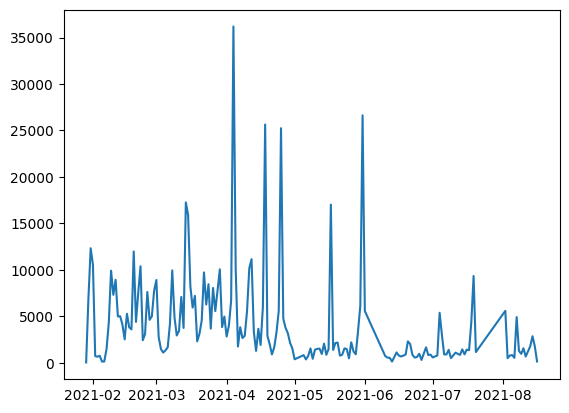

In [58]:
mins = df_top_posts.groupby('date').agg({'score': np.min}).reset_index()

fig, ax = plt.subplots()
ax.plot(mins['date'], mins['score'])

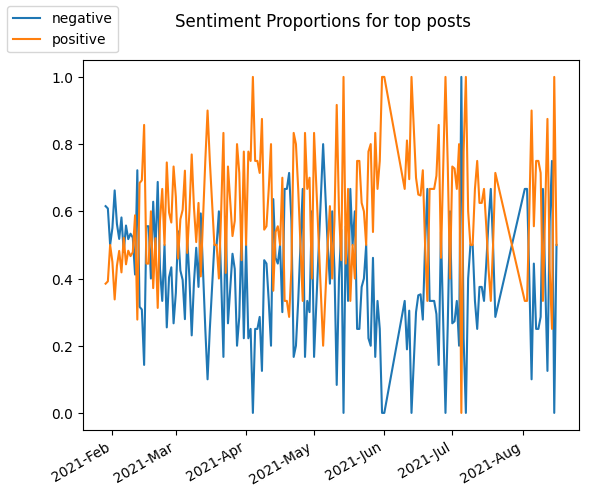

In [59]:
fig, ax = plt.subplots(1, 1)
sentiment_counts(df_top_posts, ax, relative=True)
fig.legend(loc='upper left')
fig.suptitle('Sentiment Proportions for top posts');

In [62]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342709 entries, 0 to 1342708
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   id_col      1342709 non-null  object        
 1   comments    1342709 non-null  object        
 2   score       1342709 non-null  float64       
 3   sent_label  1342709 non-null  object        
 4   sent_score  1342709 non-null  float64       
 5   hour_date   1342709 non-null  datetime64[ns]
 6   date        1342709 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 71.7+ MB


In [63]:
df_top_comments = df_comments[df_comments['id_col'].isin(df_top_posts['id'])]\
    .groupby('id_col').apply(lambda g: g[g['score']>=np.quantile(g['score'], 0.8)])\
    .reset_index(drop=True)

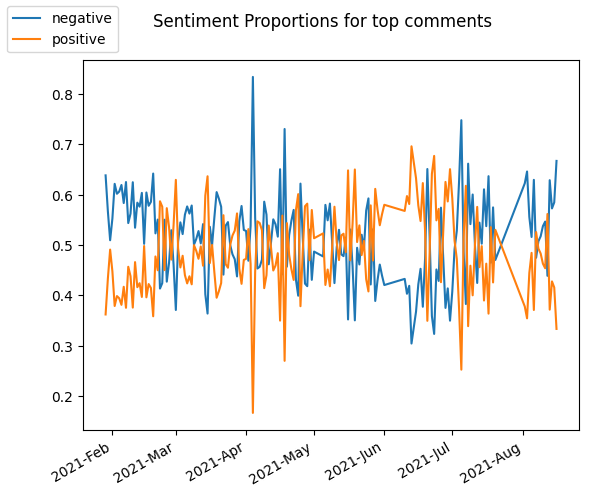

In [66]:
fig, ax = plt.subplots(1, 1)
sentiment_counts(df_top_comments, ax, relative=True)
fig.legend(loc='upper left')
fig.suptitle('Sentiment Proportions for top comments');